## Plotting Wind Magnitude

A simple demonstration of plotting wind magnitudes over time with data from the OOI Portal. This notebook assumes that the data has come parsed with the only two variables of interest: time and wind component vectors.

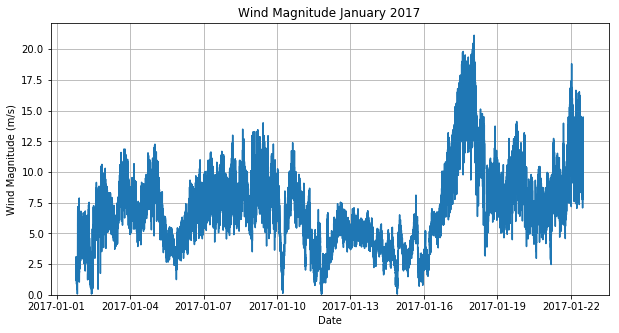

In [4]:
import datetime as d
import matplotlib.pyplot as plt
import numpy as np
import csv

# constants for adjusting time
seconds_per_year = 31557600
year_offset = 70

t = []
mag = []
with open("testwind.csv","r") as file:
    # skip headings, we know the order of data
    file.readline()
    r = csv.reader(file)
    for line in r:
        #append times
        t.append(int(line[0]))
        # use Pythagorean theorem to convert vector components to magnitude
        # mag = sqrt(x^2 + y^2)
        mag.append(np.sqrt(np.power(float(line[1]),2) + np.power(float(line[2]),2)))
        
# subtract 70 years in conversion to readable date, Python goes from 1970, OOI goes from 1900    
t = [d.datetime.utcfromtimestamp(x - year_offset * seconds_per_year) for x in t]

# set up figure
plt.figure(figsize=(10, 5))
plt.axes().set_ylim(0,max(mag) + 1)
plt.ylabel("Wind Magnitude (m/s)")
plt.xlabel("Date")
plt.title("Wind Magnitude")
plt.grid(True)


# plot points
plt.plot(t,mag)
